In [1]:
import pandas as pd
import numpy as np

import os, sys

import matplotlib.pyplot as plt

#add my own file with custom utility functions as a module
utils_path = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir)))
if utils_path not in sys.path:
    sys.path.append(utils_path)

import aku_utils as ak

# pandas options
pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
# pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True
pd.options.mode.chained_assignment = None

df = pd.read_csv(r'D:\VS Code projects\Telco customer churn\data\telco_processed.csv')
df.head()

,gender,age,married,dependents,number_of_dependents,city,latitude,longitude,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_label,ibm_spss_churn_prob,cltv,churn_category,churn_reason,new_customer
0,1,78,0,0,0,Los Angeles,34.02,-118.16,68701,0,0,1,NaN,0,0.00,0,1,DSL,8,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1,91,5433,Competitor,Competitor offered more data,0
1,0,74,1,1,1,Los Angeles,34.04,-118.19,55668,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,17,0,1,0,0,0,0,0,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,"1,024.10",3,1,69,5302,Competitor,Competitor made better offer,0
2,1,71,0,1,3,Los Angeles,34.11,-118.23,47534,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,52,0,0,0,0,1,1,1,1,Month-to-Month,1,Bank Withdrawal,95.45,"1,752.55",45.61,0,203.94,"1,910.88",2,1,81,3179,Competitor,Competitor made better offer,0
3,0,78,1,1,1,Inglewood,33.94,-118.33,27778,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,12,0,1,1,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.50,"2,514.50",13.43,0,494.00,"2,995.07",2,1,88,5337,Dissatisfaction,Limited range of services,0
4,0,80,1,1,1,Whittier,33.97,-118.02,26265,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,14,0,0,0,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,76.50,"2,868.15",0.00,0,234.21,"3,102.36",2,1,67,2793,Price,Extra data charges,0


In [2]:
ak.explore(df, target='churn_label', display_pct=False)

# The optimal number to display 'how do you call something grandiose and catastrophic'

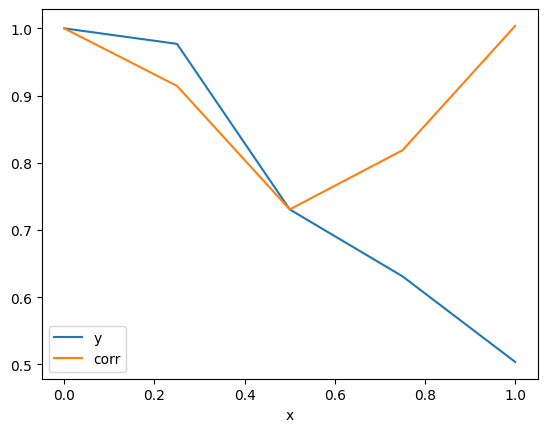

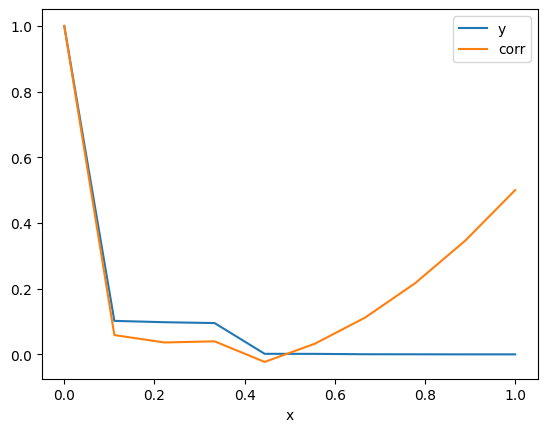

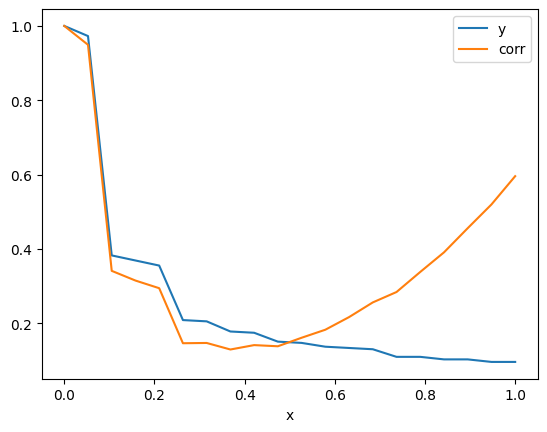

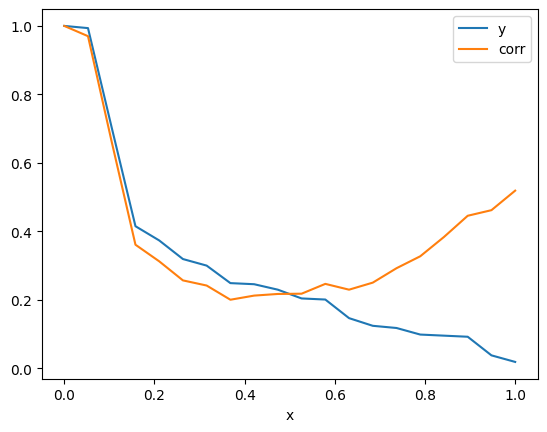

In [ ]:
test = []
for col in ['offer', 'number_of_dependents', 'city', 'churn_reason']:
    srs = df.groupby(col).size().sort_values(ascending=False).reset_index(drop=True)[:20].rename('y').reset_index().rename({'index' : 'x'}, axis=1)


    for _ in ['x', 'y']:
        srs[_] = srs[_] / srs[_].max()

    srs['corr'] = srs['y'] + srs['x']**2 - srs['x'] / 2
    test.append(srs)

for i in test:
    i.plot(x='x', y=['y', 'corr'])

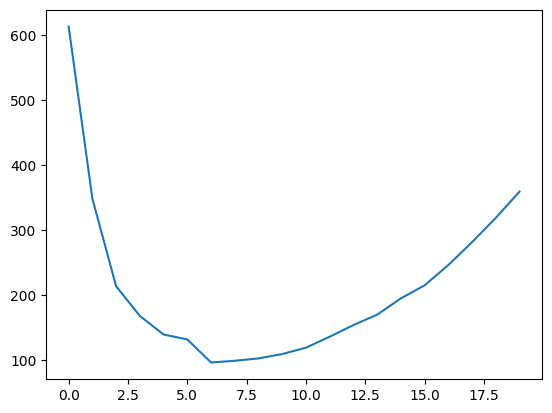

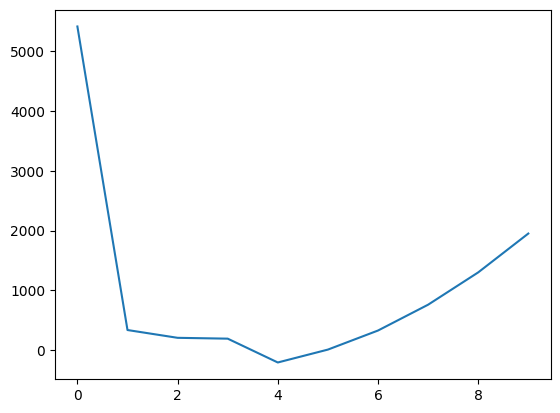

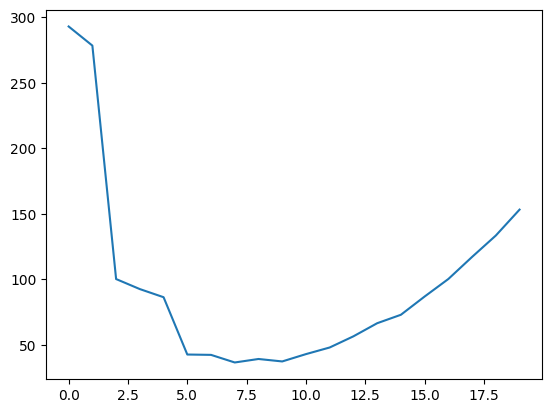

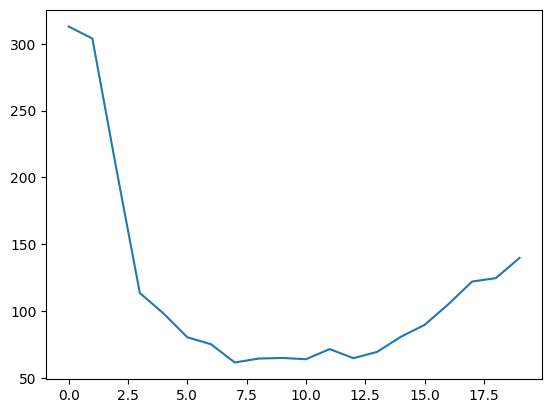

In [ ]:
test = []
for col in ['tenure_in_months', 'number_of_dependents', 'city', 'churn_reason']:
    srs = df.groupby(col).size().sort_values(ascending=False).reset_index(drop=True)[:20]
    
    srs = srs + srs[0] / len(srs)**2 * srs.index**2 - srs[0] / len(srs) * srs.index / 2
    test.append(srs)

for i in test:
    i.plot()
    plt.show()

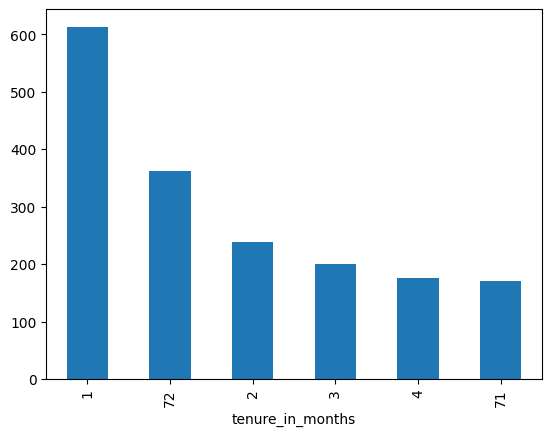

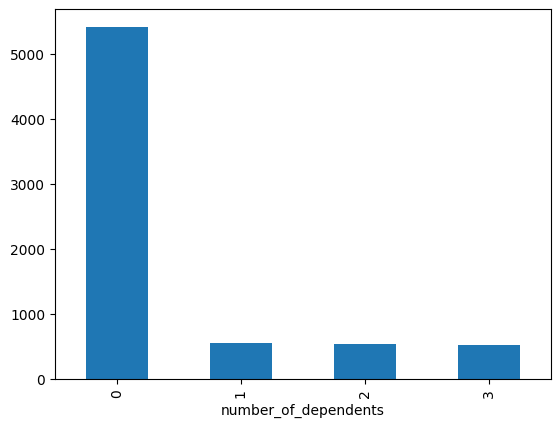

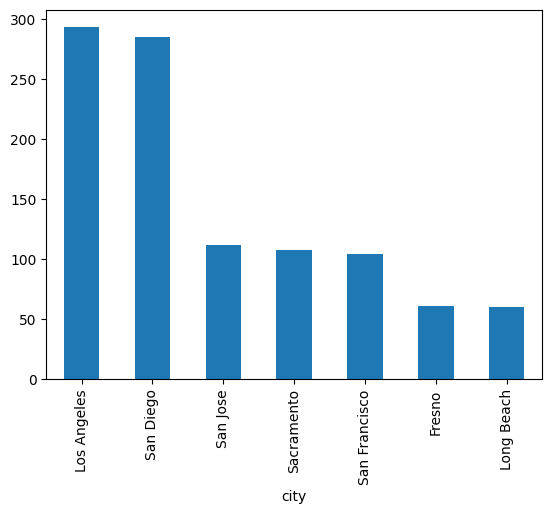

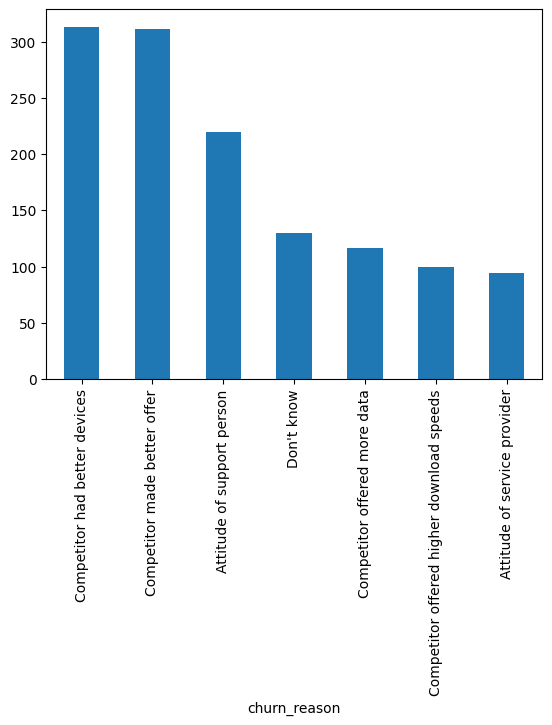

In [ ]:
for col in ['tenure_in_months', 'number_of_dependents', 'city', 'churn_reason']:
    ak.trunc_data_for_display(df.groupby(col).size()).plot(kind='bar')
    plt.show()